In [10]:
lambdas = [
    [0.242, 0.054],
    [0.399, 0.242],
    [0.242, 0.399],
    [0.054, 0.242],
]

den = 0
num = 0
for idx, (l1, l2) in enumerate(lambdas, start=1):
  l1_ = l1*.3 / (l1*.3 + l2*.7)
  den += l1_
  num += l1_ * idx

num, den
num / den

(2.4537596249589204, 1.3652453723465856)

1.7973030157512235

In [3]:
import numpy as np

heights = np.array([
    138, 130, 125, 120, 155, 90, 160, 130, 132, 122, 110, 140, 130, 134
])

mean = heights.mean()
std = heights.std()

In [7]:
import math


def pdf(x):
  return 1 / (math.sqrt(2*math.pi)*std) * np.exp((-(x - mean)**2) / (2*std**2))

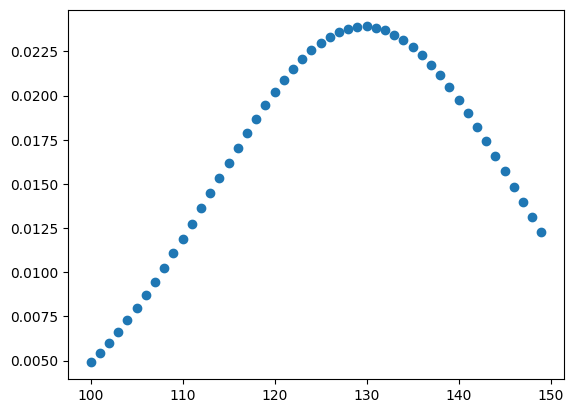

In [23]:
import matplotlib.pyplot as plt
samples = np.arange(100, 150)


plt.scatter(range(100, 150), pdf(samples))

In [68]:
pi_1 = 11/24
pi_2 = 8/24
pi_3 = 5/24

pi_1, pi_2, pi_3,

(0.4583333333333333, 0.3333333333333333, 0.20833333333333334)

In [54]:
heights = np.array([
    20, 19, 22, 21, 19, 18, 17, 25, 16, 15, 12,  # 11
    50, 49, 45, 55, 40, 42, 56, 58,  # 8
    90, 100, 110, 120, 92  # 5
])

mean_1 = heights[:11].mean()
std_1 = heights[:11].std()

mean_2 = heights[11:19].mean()
std_2 = heights[11:19].std()

mean_3 = heights[19:].mean()
std_3 = heights[19:].std()


def pdf(x, mean, std):
  return 1 / (math.sqrt(2*math.pi)*std) * np.exp((-(x - mean)**2) / (2*std**2))

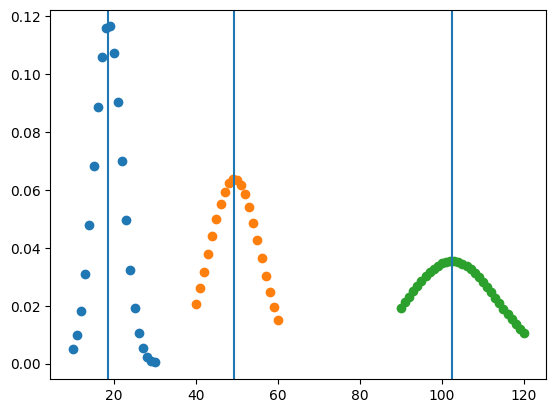

In [66]:
_ = plt.scatter(range(10, 31), pdf(np.arange(10, 31), mean_1, std_1))
_ = plt.scatter(range(40, 61), pdf(np.arange(40, 61), mean_2, std_2))
_ = plt.scatter(range(90, 121), pdf(np.arange(90, 121), mean_3, std_3))

_ = plt.axvline(mean_1)
_ = plt.axvline(mean_2)
_ = plt.axvline(mean_3)

In [70]:
def gmm_pdf(x, theta):
  mean_1, std_1, mean_2, std_2, mean_3, std_3 = theta
  return pi_1*pdf(x, mean_1, std_1) + pi_2*pdf(x, mean_2, std_2) + pi_3*pdf(x, mean_3, std_3)

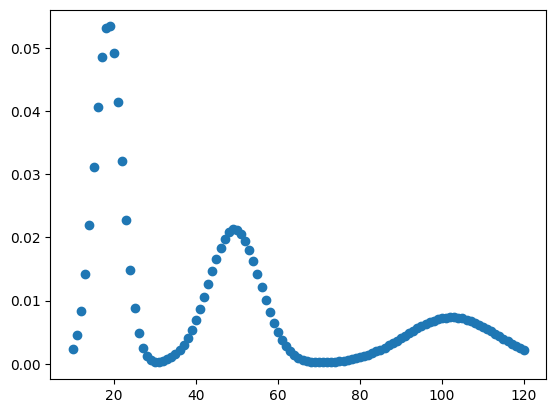

In [75]:
theta = [mean_1, std_1, mean_2, std_2, mean_3, std_3]

plt.scatter(range(10, 121), gmm_pdf(np.arange(10, 121), theta))

# aug 15 [gmm parameter estimation]

In [38]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress=True)

In [ ]:
samples = [
    (20, [1, 0, 0]),
    (120, [0, 1, 0]),
    (170, [0, 0, 1]),
    (25, [1, 0, 0]),
    (30, [1, 0, 0]),
    (12, [1, 0, 0]),
    (95, [0, 1, 0]),
    (100, [0, 1, 0]),
    (85, [0, 1, 0]),
    (110, [0, 1, 0]),
    (140, [0, 0, 1]),
    (22, [1, 0, 0]),
    (70, [0, 1, 0]),
    (145, [0, 0, 1]),
]

for i in range(len(samples)):
  for j in range(3):
    samples[i][1][j] = 0.99 if samples[i][1][j] == 1 else 0.005

n = len(samples)
heights = np.array([sample[0] for sample in samples])
lambdas = np.array([sample[1] for sample in samples])

heights
lambdas

array([ 20, 120, 170,  25,  30,  12,  95, 100,  85, 110, 140,  22,  70,
       145])

array([[0.99, 0.01, 0.01],
       [0.01, 0.99, 0.01],
       [0.01, 0.01, 0.99],
       [0.99, 0.01, 0.01],
       [0.99, 0.01, 0.01],
       [0.99, 0.01, 0.01],
       [0.01, 0.99, 0.01],
       [0.01, 0.99, 0.01],
       [0.01, 0.99, 0.01],
       [0.01, 0.99, 0.01],
       [0.01, 0.01, 0.99],
       [0.99, 0.01, 0.01],
       [0.01, 0.99, 0.01],
       [0.01, 0.01, 0.99]])

In [114]:
pi_1 = lambdas[:, 0].sum() / n
pi_2 = lambdas[:, 1].sum() / n
pi_3 = lambdas[:, 2].sum() / n

print(np.array(list(zip([lambdas[:, 0].sum(), lambdas[:, 1].sum(), lambdas[:, 2].sum()], [n, n, n]))), '\n')  # debug

print(np.array([pi_1, pi_2, pi_3]))

[[ 4.99 14.  ]
 [ 5.98 14.  ]
 [ 3.02 14.  ]] 

[0.36 0.43 0.22]


In [115]:
def get_center(k):
  print(np.array(lambdas[:, k] * heights))  # debug
  print(f'{(lambdas[:, k] * heights).sum()} / {lambdas[:, k].sum()}\n')  # debug

  return (lambdas[:, k] * heights).sum() / lambdas[:, k].sum()


center_0 = get_center(0)
center_1 = get_center(1)
center_2 = get_center(2)

print(np.array([center_0, center_1, center_2]))

[19.8   0.6   0.85 24.75 29.7  11.88  0.48  0.5   0.42  0.55  0.7  21.78
  0.35  0.72]
113.085 / 4.994999999999999

[  0.1  118.8    0.85   0.12   0.15   0.06  94.05  99.    84.15 108.9
   0.7    0.11  69.3    0.72]
577.02 / 5.98

[  0.1    0.6  168.3    0.12   0.15   0.06   0.48   0.5    0.42   0.55
 138.6    0.11   0.35 143.55]
453.89500000000004 / 3.0249999999999995

[ 22.64  96.49 150.05]


In [116]:
def get_std(k, center):
  print(np.array(list(zip((heights - center)**2, lambdas[:, k]))))  # debug
  return (((heights - center)**2 * lambdas[:, k]).sum() / lambdas[:, k].sum()) ** 0.5


get_std(0, center_0)
get_std(1, center_1)
get_std(2, center_2)

[[    6.97     0.99]
 [ 9479.04     0.01]
 [21715.08     0.01]
 [    5.57     0.99]
 [   54.17     0.99]
 [  113.2      0.99]
 [ 5236.02     0.01]
 [ 5984.63     0.01]
 [ 3888.81     0.01]
 [ 7631.83     0.01]
 [13773.45     0.01]
 [    0.41     0.99]
 [ 2243.       0.01]
 [14972.06     0.01]]


np.float64(10.988585863957193)

[[5850.97    0.01]
 [ 552.64    0.99]
 [5403.48    0.01]
 [5111.05    0.01]
 [4421.14    0.01]
 [7138.84    0.01]
 [   2.22    0.99]
 [  12.31    0.99]
 [ 132.06    0.99]
 [ 182.48    0.99]
 [1892.98    0.01]
 [5549.      0.01]
 [ 701.81    0.99]
 [2353.06    0.01]]


np.float64(17.137475715605742)

[[16912.47     0.01]
 [  902.88     0.01]
 [  398.08     0.99]
 [15636.99     0.01]
 [14411.51     0.01]
 [19057.23     0.01]
 [ 3030.28     0.01]
 [ 2504.8      0.01]
 [ 4231.23     0.01]
 [ 1603.84     0.01]
 [  100.96     0.99]
 [16396.27     0.01]
 [ 6407.67     0.01]
 [   25.48     0.99]]


np.float64(18.405515249482544)